## Importing modules

In [9]:
from tensorflow.keras.layers import Flatten,Input,Lambda,Dense
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [17]:
!pip install --upgrade tensorflow
!pip install --upgrade keras


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 94.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 41.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 75.5 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.14.0
    Uninstalling tensorflow-estimator-2.14.0:
      Successfully uninstalled tensorflow-estimator-2.14.0
  Attempting uninstall: keras
    Found existing installation: keras 2.14.0
    Uninstalling keras-2.14.0:
      Successfully uninstalled keras-2.14.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.14.1
    Uninstalling tensorboard-2.14.1:
      Successfully uninstalled tensorboard-2.14.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.14.0
    Uninstalling tensorflow-2.14.0:
      Successfully

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 999.1/999.1 kB 10.0 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0.post1 requires keras<2.16,>=2.15.0, but you have keras 3.0.1 which is incompatible.


In [3]:
!git clone https://github.com/maririn312/resnet_car_model_detection.git /content/resnet_car_model_detection

Cloning into '/content/resnet_car_model_detection'...
remote: Enumerating objects: 89, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 89 (delta 5), reused 27 (delta 2), pack-reused 53
Receiving objects: 100% (89/89), 88.96 MiB | 10.11 MiB/s, done.
Resolving deltas: 100% (15/15), done.
Updating files: 100% (40/40), done.


In [10]:
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'

### using imagenet weights

In [11]:
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [12]:
for layer in resnet.layers:
    layer.trainable = False

In [13]:
folders = glob('/content/resnet_car_model_detection/Datasets/train/*')

In [14]:
x = Flatten()(resnet.output)

In [15]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [16]:
model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃    Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 224, 224, 3)    │          0 │ -                          │
│ (InputLayer)              │                        │            │                            │
├───────────────────────────┼────────────────────────┼────────────┼────────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │          0 │ input_layer_2[0][0]        │
├───────────────────────────┼────────────────────────┼────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │      9,472 │ conv1_pad[0][0]            │
├───────────────────────────┼────────────────────────┼────────────┼────────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │        256 │ conv1_conv[0][0]           │
│ (BatchNormalization)      │                        │            │                            │
├───────────────────────────┼────────────────────────┼────────────┼────────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │          0 │ conv1_bn[0][0]             │
├───────────────────────────┼────────────────────────┼────────────┼────────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │          0 │ conv1_relu[0][0]           │
├───────────────────────────┼────────────────────────┼────────────┼────────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │          0 │ pool1_pad[0][0]            │
├───────────────────────────┼────────────────────────┼────────────┼────────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │      4,160 │ pool1_pool[0][0]           │
│ (Conv2D)                  │                        │            │                            │
├───────────────────────────┼────────────────────────┼────────────┼────────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │        256 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)      │                        │            │                            │
├───────────────────────────┼────────────────────────┼────────────┼────────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │          0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)              │                        │            │                            │
├───────────────────────────┼────────────────────────┼────────────┼────────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │     36,928 │ conv2_block1_1_relu[0][0]  │
│ (Conv2D)                  │                        │            │                            │
├───────────────────────────┼────────────────────────┼────────────┼────────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │        256 │ conv2_block1_2_conv[0][0]  │
│ (BatchNormalization)      │                        │            │                            │
├───────────────────────────┼────────────────────────┼────────────┼────────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │          0 │ conv2_block1_2_bn[0][0]    │
│ (Activation)              │                        │            │                            │
├───────────────────────────┼────────────────────────┼────────────┼────────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │     16,640 │ pool1_pool[0][0]           │
│ (Conv2D)                  │                        │            │                            │
├───────────────────────────┼────────────────────────┼────────────┼────────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │     16,640 │ conv2_block1_2_relu[0][0]  │
│ (Conv2D)             

 Total params: 24,490,889 (93.43 MB)

 Trainable params: 903,177 (3.45 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [17]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [19]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/resnet_car_model_detection/Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 8 images belonging to 8 classes.


In [20]:
test_set = test_datagen.flow_from_directory('/content/resnet_car_model_detection/Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 8 images belonging to 8 classes.


In [23]:
# Set the correct number of classes in your dataset
num_classes = 8  # Update this to match your dataset


In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# Assuming your input data has shape (224, 224, 3)
input_shape = (224, 224, 3)

# Define your model
model = Sequential()

# Flatten the input data
model.add(Flatten(input_shape=input_shape))

# Add Dense layers and other layers as needed
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# Use model.fit instead of model.fit_generator
r = model.fit(
    training_set,
    validation_data=test_set,
    epochs=50,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
)


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.2500 - loss: 2.2700 - val_accuracy: 0.1250 - val_loss: 46.6504
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/50


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 803ms/step - accuracy: 0.2500 - loss: 47.5269 - val_accuracy: 0.1250 - val_loss: 69.9808
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step - accuracy: 0.1250 - loss: 51.3360 - val_accuracy: 0.1250 - val_loss: 73.3056
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step - accuracy: 0.1250 - loss: 57.7770 - val_accuracy: 0.1250 - val_loss: 87.8862
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step - accuracy: 0.1250 - loss: 85.7188 - val_accuracy: 0.1250 - val_loss: 98.8847
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.0000e+00 - 

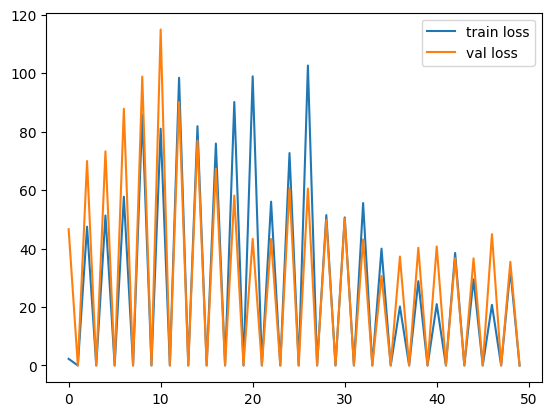

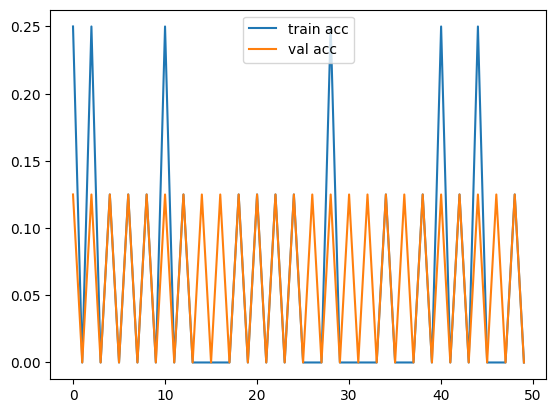

<Figure size 640x480 with 0 Axes>

In [29]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [30]:
from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [31]:
y_pred = model.predict(test_set)
y_pred


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


array([[3.0389067e-04, 1.4608109e-27, 2.7756579e-33, 1.3909163e-17,
        9.9258645e-36, 9.7877097e-01, 1.5320337e-07, 2.0924861e-02],
       [3.0389067e-04, 1.4608109e-27, 2.7756579e-33, 1.3909163e-17,
        9.9258645e-36, 9.7877097e-01, 1.5320337e-07, 2.0924861e-02],
       [3.0389067e-04, 1.4608109e-27, 2.7756579e-33, 1.3909163e-17,
        9.9258645e-36, 9.7877097e-01, 1.5320337e-07, 2.0924861e-02],
       [3.0389067e-04, 1.4608109e-27, 2.7756579e-33, 1.3909163e-17,
        9.9258645e-36, 9.7877097e-01, 1.5320337e-07, 2.0924861e-02],
       [3.0389067e-04, 1.4608109e-27, 2.7756579e-33, 1.3909163e-17,
        9.9258645e-36, 9.7877097e-01, 1.5320337e-07, 2.0924861e-02],
       [3.0389067e-04, 1.4608109e-27, 2.7756579e-33, 1.3909163e-17,
        9.9258645e-36, 9.7877097e-01, 1.5320337e-07, 2.0924861e-02],
       [3.0388951e-04, 1.4608053e-27, 2.7756579e-33, 1.3909110e-17,
        9.9257885e-36, 9.7877097e-01, 1.5320279e-07, 2.0924939e-02],
       [3.0388951e-04, 1.4608053e-27, 2.7

In [32]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([5, 5, 5, 5, 5, 5, 5, 5])

In [33]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
model=load_model('model_resnet50.h5')

In [36]:
img=image.load_img(r'/content/resnet_car_model_detection/Datasets/test/volkswagen/volkswagen_3.png',target_size=(224,224))
x=image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [37]:
x.shape
x=x/255

In [38]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [39]:
model.predict(img_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


array([[0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

In [40]:
a=np.argmax(model.predict(img_data), axis=1)
a

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


array([6])